# Homework #6
> Kim Dohoon, 2022094093

In [30]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import copy

In [31]:
#### DATA
n = 100 # number of trials per
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
y = numpy.array([.94, .77, .40, .26, .24, .16]) # proportion of correct
x = n*y # number of correct responses

# Leave One Out Cross Validation (LOOCV)

## define models
def exp_train(w):
  pred = w[0]*numpy.exp(-w[1]*t_train)
  SSE = numpy.sum((y_train - pred)**2)
  return SSE

def exp_test(w):
  pred = w[0]*numpy.exp(-w[1]*t_test)
  SSE = numpy.sum((y_test - pred)**2) 
  return SSE

def exp_pre(w):
  pred = w[0]*numpy.exp(-w[1]*t) 
  return pred

def power_train(w):
  pred = w[0]*numpy.power(t_train, -w[1])
  SSE = numpy.sum((y_train - pred)**2)
  return SSE

def power_test(w):
  pred = w[0]*numpy.power(t_test, -w[1])
  SSE = numpy.sum((y_test-pred)**2)
  return SSE

def power_pre(w):
  pred = w[0]*numpy.power(t, -w[1])
  return pred

    


In [32]:
## LOCCV with exp function
n = 100 # number of trials per
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
y = numpy.array([.94, .77, .40, .26, .24, .16]) # proportion of correct
x = n*y # number of correct responses
exp_test_sse = []
exp_test_pre = []
#### inefficient way of implementing a CV algorithm
#### there is a function for this from sklearn.model_selection import cross_val_score
#### but this code is easier(helpful?) to understand the process
for i in range(len(t)):
  temp_t = copy.deepcopy(list(t))
  temp_y = copy.deepcopy(list(y))
  t_test = numpy.array(temp_t[i])
  y_test = numpy.array(temp_y[i])
  del temp_t[i]
  del temp_y[i]
  t_train = numpy.array(temp_t)
  y_train = numpy.array(temp_y)
  print(i, t_train, y_train)
   
  start_pt = numpy.abs(numpy.random.random(2))  # two random number from 0~1
  res_exp = scipy.optimize.minimize(exp_train, start_pt, method='nelder-mead')
  exp_test_sse.append(exp_test(res_exp['x'])) ### saving SSE (or LSE)
  exp_test_pre.append(exp_pre(res_exp['x'])) ### saving predictions of the fit model
  print(exp_pre(res_exp['x']))
  print('________________________________________________________')

print("Results (mean error) by exp: %f"%numpy.mean(exp_test_sse))
exp_mean_error = numpy.mean(exp_test_sse)

0 [ 3  6  9 12 18] [0.77 0.4  0.26 0.24 0.16]
[0.97633805 0.7284451  0.4694526  0.30254269 0.19497619 0.08097882]
________________________________________________________
1 [ 1  6  9 12 18] [0.94 0.4  0.26 0.24 0.16]
[0.91871634 0.69242638 0.4530664  0.29644908 0.19397169 0.08304526]
________________________________________________________
2 [ 1  3  9 12 18] [0.94 0.77 0.26 0.24 0.16]
[0.95313375 0.73270865 0.4938528  0.33286162 0.22435199 0.10192068]
________________________________________________________
3 [ 1  3  6 12 18] [0.94 0.77 0.4  0.24 0.16]
[0.94106078 0.72344857 0.4876325  0.32868329 0.22154533 0.10065435]
________________________________________________________
4 [ 1  3  6  9 18] [0.94 0.77 0.4  0.26 0.16]
[0.95627528 0.70995185 0.45414845 0.29051381 0.18583851 0.07604552]
________________________________________________________
5 [ 1  3  6  9 12] [0.94 0.77 0.4  0.26 0.24]
[0.95896013 0.71138894 0.4545346  0.29042017 0.18556096 0.07575413]
_______________________________

In [33]:
## LOCCV with power function
n = 100 # number of trials per
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
y = numpy.array([.94, .77, .40, .26, .24, .16]) # proportion of correct
x = n*y # number of correct responses
power_test_sse = []
power_test_pre = []
#### inefficient way of implementing a CV algorithm
#### there is a function for this from sklearn.model_selection import cross_val_score
#### but this code is easier(helpful?) to understand the process
for i in range(len(t)):
  temp_t = copy.deepcopy(list(t))
  temp_y = copy.deepcopy(list(y))
  t_test = numpy.array(temp_t[i])
  y_test = numpy.array(temp_y[i])
  del temp_t[i]
  del temp_y[i]
  t_train = numpy.array(temp_t)
  y_train = numpy.array(temp_y)
  print(i, t_train, y_train)
   
  start_pt = numpy.abs(numpy.random.random(2))  # two random number from 0~1
  res_power = scipy.optimize.minimize(power_train, start_pt, method='nelder-mead')
  power_test_sse.append(power_test(res_power['x'])) ### saving SSE (or LSE)
  power_test_pre.append(power_pre(res_power['x'])) ### saving predictions of the fit model
  print(power_pre(res_power['x']))
  print('________________________________________________________')

print("Results (mean error) by power: %f"%numpy.mean(power_test_sse))
power_mean_error = numpy.mean(power_test_sse)

0 [ 3  6  9 12 18] [0.77 0.4  0.26 0.24 0.16]
[2.07456387 0.76555984 0.40814979 0.28250847 0.21760056 0.15061628]
________________________________________________________
1 [ 1  6  9 12 18] [0.94 0.4  0.26 0.24 0.16]
[0.94531005 0.51547762 0.35159715 0.28108998 0.2398175  0.19172594]
________________________________________________________
2 [ 1  3  9 12 18] [0.94 0.77 0.26 0.24 0.16]
[1.00291398 0.57270786 0.40216906 0.32704129 0.28241267 0.22965617]
________________________________________________________
3 [ 1  3  6 12 18] [0.94 0.77 0.4  0.24 0.16]
[1.00114943 0.58661864 0.41868741 0.34372634 0.29882983 0.24532785]
________________________________________________________
4 [ 1  3  6  9 18] [0.94 0.77 0.4  0.26 0.16]
[1.00000589 0.58062932 0.41203506 0.33712842 0.29239463 0.23923823]
________________________________________________________
5 [ 1  3  6  9 12] [0.94 0.77 0.4  0.26 0.24]
[0.99538412 0.58440445 0.41763208 0.34311233 0.29845179 0.24519785]
_______________________________

Results (mean error) by power function: 0.22817258155229014
Results (mean error) by exp function: 0.0051491158361108786


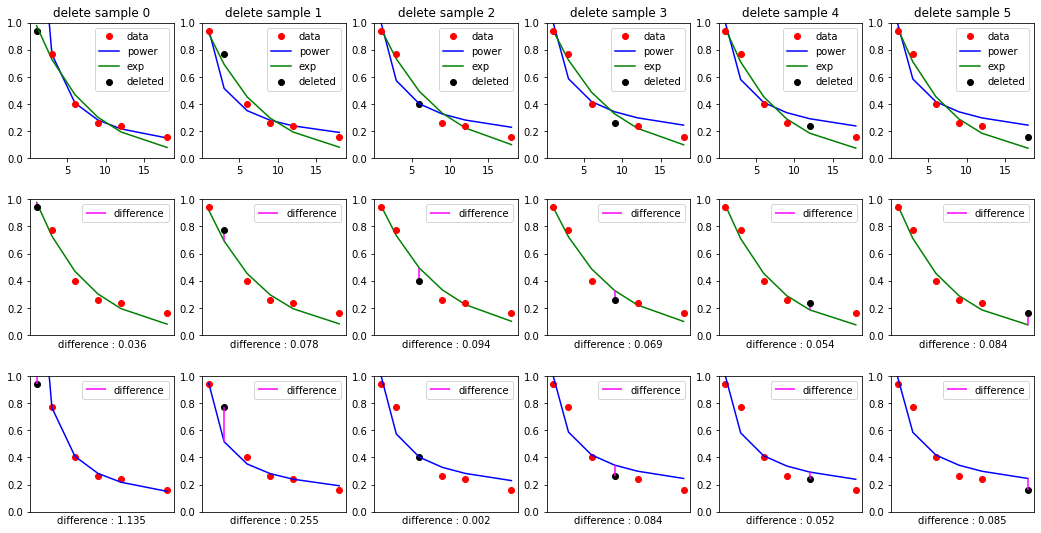

In [61]:
#### Plot them
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
plt.figure(figsize=(18,9))

# Show them together
for i in range(len(t)):
  temp_t = copy.deepcopy(list(t))
  temp_y = copy.deepcopy(list(y))
  t_test = numpy.array(temp_t[i])
  y_test = numpy.array(temp_y[i])
  delt_sample = temp_t[i]
  dely_sample = temp_y[i]
  del temp_t[i]
  del temp_y[i]
  t_train = numpy.array(temp_t)
  y_train = numpy.array(temp_y)
  start_pt = numpy.abs(numpy.random.random(2))*1  # two random number from 0~1
  res_exp = scipy.optimize.minimize(exp_train, start_pt, method='nelder-mead')
  res_power = scipy.optimize.minimize(power_train, start_pt, method='nelder-mead')
  pre_power = power_pre(res_power['x'])
  pre_exp = exp_pre(res_exp['x'])

  # Together
  plt.subplot(3,6,i+1)
  plt.ylim(0,1)
  plt.plot(t_train, y_train, 'ro', zorder=4)
  plt.title('delete sample '+str(i))
  plt.plot(t, pre_power, 'b')
  plt.plot(t, pre_exp, 'g')
  plt.scatter(delt_sample,dely_sample,color='black')
  plt.legend(['data',"power","exp","deleted"])

  # exp only
  plt.subplot(3,6,i+7)
  plt.ylim(0,1)
  plt.plot(t_train, y_train, 'ro', zorder=4)
  plt.plot(t, pre_exp, 'g')
  plt.scatter(delt_sample,dely_sample,color='black', zorder=4)
  plt.vlines(x=delt_sample, ymin=dely_sample, ymax=pre_exp[i], color='magenta', label='difference')
  plt.legend()
  plt.gca().axes.xaxis.set_ticks([])
  plt.xlabel(f"difference : {abs(pre_exp[i]-dely_sample):.3f}")
  plt.subplots_adjust(hspace=0.3)

  # power only
  plt.subplot(3,6,i+13)
  plt.ylim(0,1)
  plt.plot(t_train, y_train, 'ro')
  plt.plot(t, pre_power, 'b')
  plt.scatter(delt_sample,dely_sample,color='black')
  plt.vlines(x=delt_sample, ymin=dely_sample, ymax=pre_power[i], color='magenta', label='difference')
  plt.legend()
  plt.xlabel(f"difference : {abs(pre_power[i]-dely_sample):.3f}")
  plt.gca().axes.xaxis.set_ticks([])

print(f"Results (mean error) by power function: {power_mean_error}")
print(f"Results (mean error) by exp function: {exp_mean_error}")
#plt.savefig("LOOCV.jpg")


In [8]:
# Calculate AIC and BIC
num_of_data = len(t)

# Exponential model
exp_AIC = num_of_data * numpy.log(numpy.mean(exp_test_sse)) - num_of_data * numpy.log(num_of_data) + 2*2
exp_BIC = num_of_data * numpy.log(numpy.mean(exp_test_sse)) - num_of_data * numpy.log(num_of_data) + numpy.log(num_of_data) * 2

# Power model
power_AIC = num_of_data * numpy.log(numpy.mean(power_test_sse) ) - num_of_data * numpy.log(num_of_data) + 2*2
power_BIC = num_of_data * numpy.log(numpy.mean(power_test_sse)) - num_of_data * numpy.log(num_of_data) + numpy.log(num_of_data) * 2

# Print
print("Exponential Model")
print(f"AIC : {exp_AIC}, BIC : {exp_BIC}")
print("___________________________________________________")
print(f"Power Model")
print(f"AIC : {power_AIC}, BIC : {power_BIC}")

# The smaller the AIC, the greater the generalizability, and should be preferred
# The smaller the BIC, the greater the generalizability, and should be preferred


Exponential Model
AIC : -38.36427719749692, BIC : -38.78075825904081
___________________________________________________
Power Model
AIC : -15.616095504089401, BIC : -16.032576565633292


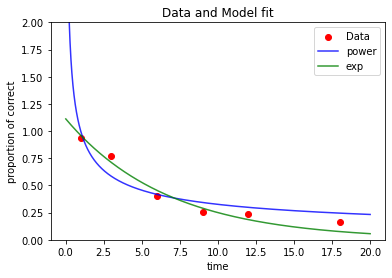

In [86]:
# Plot two functions
EXP_results = scipy.optimize.minimize(exp_train, start_pt, method='nelder-mead')
POWER_results = scipy.optimize.minimize(power_train, start_pt, method='nelder-mead')

model_t = numpy.arange(.01,20.01,.01)
pred_exp = EXP_results['x'][0]*numpy.exp(-EXP_results['x'][1]*model_t)
pred_power = POWER_results['x'][0]*numpy.power(model_t,-POWER_results['x'][1])

plt.scatter(t, y, label='Data', color='r') ### Data
plt.plot(model_t, pred_power, label='power', color='b', alpha=0.8)# ls='--', lw=2)
plt.plot(model_t, pred_exp, label='exp', color='g', alpha=0.8)#, ls='--', lw=2)
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Data and Model fit')
plt.ylim(0,2)
plt.savefig('modelfit.jpg')